In [275]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random

In [276]:
data = datasets.load_iris()
X = data.data

In [277]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [278]:
# reducing features to useful features only
class PCA:
    def __init__(self, n):
        self.n = n
        self.mean = None
        self.components = None
        
    def fit(self, vec):
        self.mean = np.mean(vec, axis = 0)
        vec -= self.mean

        cov = np.cov(vec.T)

        eigenvectors, eigenvalues = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T

        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n]
        
        

    def transform(self, vec):
        vec -= self.mean
        return np.dot(vec, self.components.T)

In [303]:
pca = PCA(2)
print(X)
pca.fit(X)
a = pca.transform(X)
a

[[-6.58666667e+00 -2.61466667e+00 -6.11600000e+00 -2.19866667e+00]
 [-6.78666667e+00 -3.11466667e+00 -6.11600000e+00 -2.19866667e+00]
 [-6.98666667e+00 -2.91466667e+00 -6.21600000e+00 -2.19866667e+00]
 [-7.08666667e+00 -3.01466667e+00 -6.01600000e+00 -2.19866667e+00]
 [-6.68666667e+00 -2.51466667e+00 -6.11600000e+00 -2.19866667e+00]
 [-6.28666667e+00 -2.21466667e+00 -5.81600000e+00 -1.99866667e+00]
 [-7.08666667e+00 -2.71466667e+00 -6.11600000e+00 -2.09866667e+00]
 [-6.68666667e+00 -2.71466667e+00 -6.01600000e+00 -2.19866667e+00]
 [-7.28666667e+00 -3.21466667e+00 -6.11600000e+00 -2.19866667e+00]
 [-6.78666667e+00 -3.01466667e+00 -6.01600000e+00 -2.29866667e+00]
 [-6.28666667e+00 -2.41466667e+00 -6.01600000e+00 -2.19866667e+00]
 [-6.88666667e+00 -2.71466667e+00 -5.91600000e+00 -2.19866667e+00]
 [-6.88666667e+00 -3.11466667e+00 -6.11600000e+00 -2.29866667e+00]
 [-7.38666667e+00 -3.11466667e+00 -6.41600000e+00 -2.29866667e+00]
 [-5.88666667e+00 -2.11466667e+00 -6.31600000e+00 -2.19866667e

array([[16.1507271 ,  1.58067961],
       [13.9880721 ,  1.53680784],
       [14.77736534,  1.52341565],
       [14.345916  ,  1.56174534],
       [16.5492842 ,  1.58611705],
       [17.94305488,  2.53756351],
       [15.60895107,  1.98376529],
       [15.71145681,  1.59474223],
       [13.44391256,  1.51706935],
       [14.41633371,  1.1460717 ],
       [17.07699762,  1.62773912],
       [15.67074361,  1.61424228],
       [13.96142152,  1.11160016],
       [13.81662329,  1.02688139],
       [18.41907558,  1.58793478],
       [20.11433506,  2.53528463],
       [17.91177108,  2.44049521],
       [16.15311061,  2.00350378],
       [17.59064842,  2.11406891],
       [17.42940408,  2.05123371],
       [15.82416701,  1.65281041],
       [17.00896341,  2.46623693],
       [16.4209321 ,  1.47951472],
       [15.33569214,  2.90631145],
       [15.69420646,  1.68704351],
       [14.02798108,  1.5877255 ],
       [15.72404478,  2.46465764],
       [16.18281513,  1.6073302 ],
       [15.75217001,

In [280]:
def get_squared_dis(x1, y1, x2, y2):
    return (x1 - x2)**2 + (y1 - y2)**2

In [281]:
def compute_init_centroids(K, matrix):
    random_idx = np.random.permutation(matrix.shape[0])
    
    centroids = matrix[random_idx[:K]]
    
    return centroids
    

In [282]:
def get_cluster_index(centroids, matrix, K):
    m ,n = matrix.shape
    cluster_index = np.zeros(m)

    for i in range(m):

        d = get_squared_dis(matrix[i][0], matrix[i][1], centroids[0][0], centroids[0][1])
        ans = 0
        for j in range(1, K):
            new_d = get_squared_dis(matrix[i][0], matrix[i][1], centroids[j][0], centroids[j][1])
            if(new_d < d):
                d = new_d
                ans = j

        cluster_index[i] = ans

    return cluster_index
                
            

In [283]:
def compute_centroids(cluster_index, matrix, centroids, k):
    m, n = matrix.shape
    new_centroids = []

    for i in range(k):

        x_m, y_m = 0, 0
        n = 0
        for j in range(m):
            if cluster_index[j] == i:
                x_m += matrix[j][0]
                y_m += matrix[j][1]
                n += 1

        if n != 0:
            x_m /= n
            y_m /= n

        new_centroids.append([x_m ,y_m])

    return np.array(new_centroids)

In [284]:
def run_KMeans(matrix, K, iterations):
    m, n = matrix.shape
    centroids = compute_init_centroids(K, matrix)

    for i in range(iterations):

        cluster_index = get_cluster_index(centroids, matrix, K)

        centroids = compute_centroids(cluster_index, matrix, centroids, K)

    return cluster_index, centroids

In [285]:
def cal_cohesion(arr, j):

    d = 0
    
    for i in range(len(arr)):
        if i != j:
            d += get_squared_dis(arr[i][0], arr[i][1], arr[j][0], arr[j][1])

    if len(arr) - 1:
        return d/(len(arr) - 1)

    return 0

In [286]:
def cal_separation(cluster_index, matrix, k_val, K, x, y):
    d = 0
    m, n = matrix.shape
    total = 0

    for i in range(m):
        if i != cluster_index[k_val]:
            d += get_squared_dis(matrix[i][0], matrix[i][1], x, y)
            total += 1

    if total:
        return d/total

    return 0
    

In [287]:
def cal_shilloute_dis(cluster_index, centroids, matrix, K):
    m, n = matrix.shape

    si = 0
    
    for i in range(K):
        arr = []
        for j in range(m):
            if cluster_index[j] == i:
                arr.append(matrix[j])

        for j in range(len(arr)):
            cohesion = cal_cohesion(arr, j)
            separation = cal_separation(cluster_index, matrix, i, K, arr[j][0], arr[j][1])

            if(max(cohesion, separation)):
                si += (separation - cohesion)/max(cohesion, separation)

    if m:
        return si/m
    return 0

In [288]:
def apply_clustering(matrix):
    best, K = -1, 1
    best_cluster_index, best_centroids = None, None
    
    for i in range(1, 15):
        cluster_index, centroids = run_KMeans(matrix, i, 20)
        score = cal_shilloute_dis(cluster_index, centroids, matrix, i)
        if score > best:
            best = score
            K = i
            best_cluster_index = cluster_index
            best_centroids = centroids
    
    return best, K, best_cluster_index, best_centroids

In [289]:
best, K, cluster_index, centroids = apply_clustering(a)
best, K, cluster_index, centroids

(np.float64(0.9592588283294521),
 14,
 array([ 9.,  0., 10.,  0.,  9.,  4., 10., 10.,  0.,  0.,  9., 10.,  0.,
         0.,  2.,  7.,  4.,  9.,  4.,  4., 10.,  4.,  9., 10., 10.,  0.,
        10.,  9., 10., 10.,  0., 10.,  2.,  7.,  0., 10.,  9.,  9.,  0.,
        10.,  9.,  0., 10.,  9.,  4.,  0.,  4., 10.,  9., 10., 11., 11.,
        11.,  8.,  5.,  3., 11.,  8.,  5.,  3.,  8.,  5.,  8.,  5.,  5.,
        11.,  5.,  3.,  8.,  8.,  6.,  3.,  3.,  3.,  5.,  5.,  5.,  6.,
         5.,  3.,  8.,  8.,  3., 12.,  5., 11., 11.,  8.,  5.,  3.,  3.,
         5.,  3.,  8.,  3.,  5.,  5.,  5.,  8.,  3., 13., 12.,  1.,  6.,
         1.,  1., 12.,  6., 12., 13.,  6., 12.,  1., 12.,  1.,  1.,  6.,
        13.,  1.,  8.,  1., 12.,  1., 12., 13.,  6., 12.,  6.,  1., 11.,
         6., 13.,  1.,  5.,  3.,  1., 13.,  6.,  6.,  1.,  1.,  1., 12.,
         1., 13.,  1., 12.,  6., 13.,  6.]),
 array([[-15.53761663, -11.22478921],
        [-14.55118819,  -1.52499845],
        [-10.76706969, -11.31315034],


In [290]:
COLOR_MAP = {}
for i in range(K):
    COLOR_MAP[i] = (random.random(), random.random(), random.random())
def get_color_for_plot(i, K):
    return COLOR_MAP[i]

In [301]:
def make_graph(K, cluster_index, centroids, matrix):

    m, n = matrix.shape

    # plotting data points
    for i in range(m):
        color = get_color_for_plot(cluster_index[i], K)
        plt.scatter(matrix[i][0], matrix[i][1], marker = "o", color = color, s=50, edgecolors="black")

    # plotting centroids
    for i in range(K):
        color = get_color_for_plot(i, K)
        plt.scatter(centroids[i][0], centroids[i][1], marker = "o", color = color, s = 200, edgecolors = "black")

    plt.title("Scatter Plot")

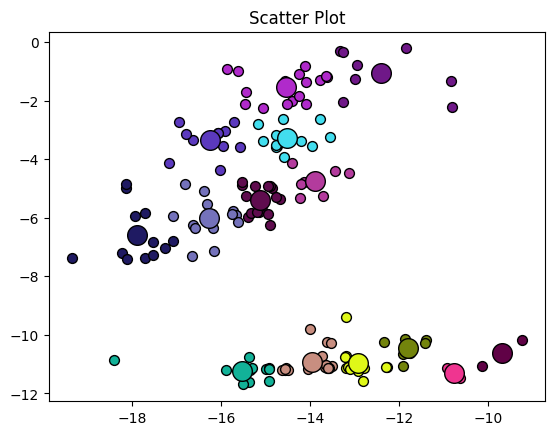

In [302]:
make_graph(K, cluster_index, centroids, a)